In [1]:
import numpy as np
from matplotlib import pyplot as plt
import math 
import random
import torch
import torchvision
import torch.nn as nn
import numpy as np
torch.backends.cudnn.enabled = True
import torch
import torchvision
import torch.nn as nn
import numpy as np
import seaborn as sns

In [2]:
import sys
import torch
import torch.utils
import torch.nn as nn
from torch.autograd import Variable
from torchvision import models

try:
    import gpustat
except ImportError:
    raise ImportError("pip install gpustat")


def show_memusage(device=0):
    gpu_stats = gpustat.GPUStatCollection.new_query()
    item = gpu_stats.jsonify()["gpus"][device]
    print("{}/{}".format(item["memory.used"], item["memory.total"]))

In [3]:
show_memusage()
torch.cuda.empty_cache()


309/4038


In [4]:
N=100
epsilon=1/N
acc0=0

In [5]:
a=[]
F=[]
acc=0.0

for k in range(N):
    F.append((100)*math.sin(4*3.1416*k/N))
    #F.append(0.03*k*k/N)
    #.append(random.randint(0, 100))
beta=F[0]

In [6]:
torch.manual_seed(298630698)
dtype = torch.float32

In [7]:
X = torch.zeros((N,1,1),requires_grad=False,dtype=torch.float32)
Y = torch.zeros((N,1,1),requires_grad=False,dtype=torch.float32)
#Z = torch.zeros((N,1,1),requires_grad=False,dtype=torch.float32)
#h = torch.zeros((N,1,1),requires_grad=False,dtype=torch.float32)
#L = torch.zeros((N,1,1),requires_grad=False,dtype=torch.float32)
#loss = torch.zeros((N,1,1),requires_grad=False,dtype=torch.float32)
W = torch.randn((1,N),requires_grad=True,dtype=torch.float32)
W1 = torch.randn((N,N,N),requires_grad=True,dtype=torch.float32)
b = torch.randn((N,),requires_grad=True,dtype=torch.float32)
b1 = torch.randn((N,),requires_grad=True,dtype=torch.float32)
a = torch.randn((N,),requires_grad=True,dtype=torch.float32)
m = nn.ReLU()
Loss=[]

In [8]:
for k in range(N):
    #F.append((100)*math.sin(4*3.1416*k/N))
    #X[k,0,0]= 0.03*k*k/N
    Y[k,0,0]= (0.3)*math.sin(4*3.1416*k/N)
    X[k,0,0]= k/N
    #.append(random.randint(0, 100))


In [9]:
X=X.to("cuda:0")
Y=Y.to("cuda:0")
#Z=Z.to("cuda:0")
#h=h.to("cuda:0")
W=W.to("cuda:0")
W1=W1.to("cuda:0")
#loss = loss.to("cuda:0")
b=b.to("cuda:0")
b1=b1.to("cuda:0")
a=a.to("cuda:0")
m = nn.ReLU().to('cuda')
print("Tensor device:", X.device)
print("Tensor device:", W.device)
print("Tensor device:", b.device)
print("Tensor device:", a.device)

Tensor device: cuda:0
Tensor device: cuda:0
Tensor device: cuda:0
Tensor device: cuda:0


In [10]:
print("CUDA GPU:", torch.cuda.is_available())

CUDA GPU: True


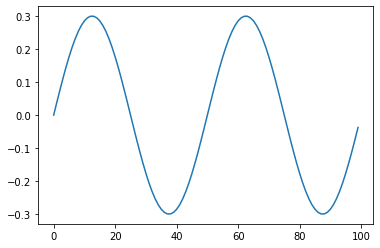

In [11]:

plt.plot(Y[:,0,0].cpu())

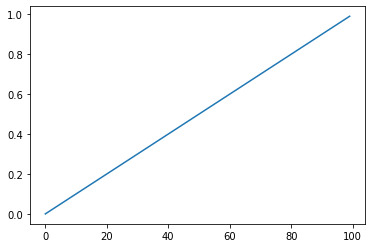

In [12]:
plt.plot(X[:,0,0].cpu())

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

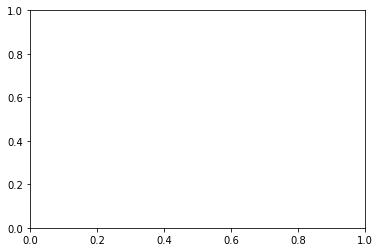

In [13]:
plt.plot(a)

In [ ]:
print("Tensor device:", X.device)
print("Tensor device:", W.device)
print("Tensor device:", b.device)
print("Tensor device:", a.device)

In [18]:
W.retain_grad()
W1.retain_grad()
b.retain_grad()
b1.retain_grad()
a.retain_grad()


In [19]:
Loss=[]  #nn.ModuleList()
val =0.0

In [20]:
print(W1.shape)

torch.Size([100, 100, 100])


In [21]:
for i in range (550000):
    Z= X   +b
    h=m(Z)
    #Z1 = h @ W1 +b1
    #print(W1.shape)
    #h2 = m(Z1)
    L= h @ a 
    loss = torch.sum((L-Y[:,:,0])**2)
    #loss = torch.abs((L-Y[:,:,0]))
    W.grad = None
    W1.grad = None
    b.grad = None
    b1.grad = None
    a.grad = None
    loss.backward()
    val= loss #.detach().numpy()
    Loss.append(val.cpu())
    #Loss.append(val.detach().numpy())
    r=0.0001
    
    a.data-=r*a.grad
    b.data-=r*b.grad
    #b1.data-=r*b1.grad
    #W.data-=r*W.grad
    #W1.data-=r*W1.grad
    

print(val)


tensor(0.0023, device='cuda:0', grad_fn=<SumBackward0>)


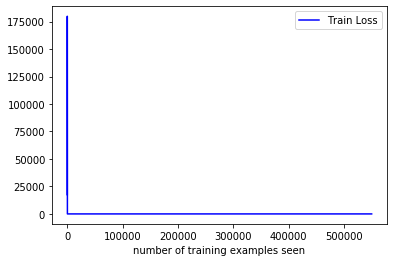

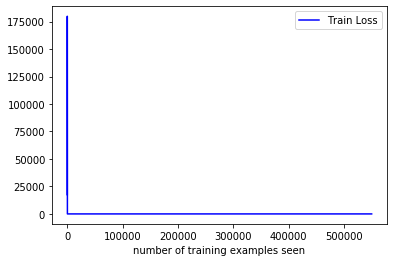

In [22]:
losses= [ loss.detach().numpy() for loss in Loss]
fig = plt.figure()
plt.plot(losses, color='blue')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
fig

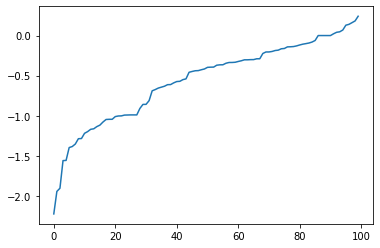

In [23]:
j = b.cpu()
asorted, indices = torch.sort(j)
plt.plot(asorted.data)


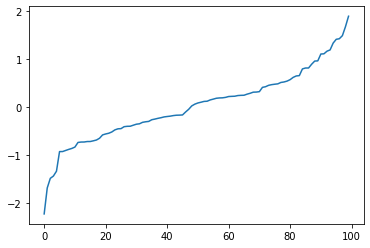

In [24]:
j = a.cpu()
asorted, indices = torch.sort(j)
plt.plot(asorted.data)

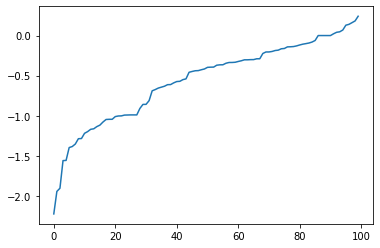

In [25]:
j = b.cpu()
asorted, indices = torch.sort(j)
plt.plot(asorted.data)

In [26]:
indices

tensor([25, 61, 52, 69, 35,  6, 91, 44, 20, 98, 74, 21, 19,  9, 67, 79, 95, 42,
        15,  4, 22, 54,  7, 39, 87, 37, 66, 93, 17, 16, 46, 94, 41, 10, 36, 68,
        26, 76, 59, 99, 50,  1, 90,  0, 33, 13, 11,  3, 34,  8, 12, 29, 48, 58,
        38, 62, 96, 57, 63, 60, 65, 18, 75, 82, 64, 72, 43, 77, 71, 30, 32, 70,
        14, 49, 85, 53, 84, 24, 51, 86, 47,  5, 23, 55, 31,  2, 80, 28, 92, 45,
        56, 83, 27, 73, 88, 40, 97, 81, 89, 78])

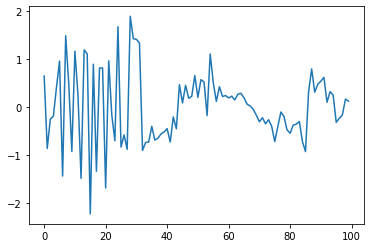

In [27]:
j = a[indices].cpu()
plt.plot(j.detach().numpy())

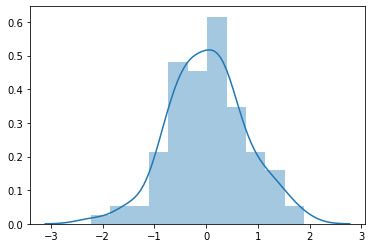

In [28]:


#sns.set_style('darkgrid')
sns.distplot(j.detach().numpy())

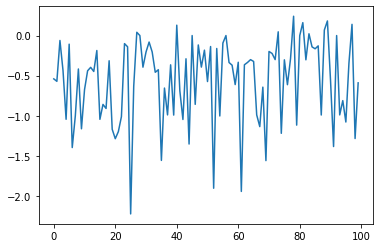

In [29]:
j = b.cpu()
plt.plot(j.detach().numpy())

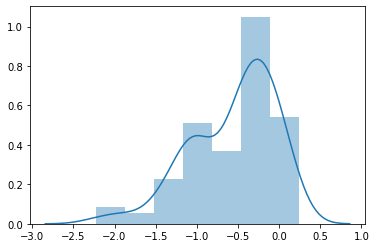

In [30]:
sns.distplot(j.detach().numpy())

In [31]:
W

tensor([[ 0.2848,  0.0445, -1.4078, -1.7125, -1.1542,  1.3561,  0.1771,  3.0362,
         -0.9293,  0.5697,  0.3994, -0.6076, -0.2957, -1.0103,  1.0140,  0.6007,
          0.8172,  0.0358, -0.0587,  0.1110,  0.6352, -1.2886, -1.2917,  0.2378,
         -2.2904,  2.0620, -0.3988,  0.2300, -0.7375, -1.5803,  1.9043,  0.8342,
         -0.5394, -0.2863,  0.7552, -1.4401, -0.7344, -0.5900, -0.0160,  1.1909,
          1.1543, -2.2660, -1.1205,  0.3592,  0.8846,  0.9100,  0.9892,  1.3655,
         -0.2634,  1.2852,  0.6415,  0.0957, -2.8754,  0.0762, -0.5328, -0.6784,
         -1.0010, -1.7630, -0.0952, -1.0089,  0.1307,  0.3267,  0.4599,  0.4167,
         -1.2189, -0.3452,  1.1094,  0.9022,  0.9829,  0.3178, -0.6924,  0.9345,
          0.5619,  0.1010,  0.2795, -2.0891,  0.6488, -0.3395, -0.8081, -1.1036,
          0.7093,  0.8432,  0.2456,  1.0418,  0.5844,  0.9077,  0.7051,  0.1416,
         -0.6238, -0.9880,  0.5684, -0.7313, -0.4186,  1.2076, -2.7492,  0.3762,
         -2.3171,  0.0473,  

In [32]:
plt.plot(a.detach().numpy())

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

In [33]:
plt.imshow(W.detach().numpy(), interpolation='none')
plt.show()

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

In [34]:
Z=X  +b
h=m(Z)
L= h @ a 
L = L.cpu()

In [35]:
b

tensor([-5.4049e-01, -5.7105e-01, -6.1628e-02, -4.3736e-01, -1.0447e+00,
        -1.0752e-01, -1.3974e+00, -1.0022e+00, -4.1704e-01, -1.1633e+00,
        -6.7394e-01, -4.3928e-01, -3.9660e-01, -4.4805e-01, -1.8675e-01,
        -1.0450e+00, -8.5918e-01, -9.0974e-01, -3.1455e-01, -1.1697e+00,
        -1.2870e+00, -1.1986e+00, -1.0111e+00, -1.0067e-01, -1.3998e-01,
        -2.2253e+00, -6.3230e-01,  4.0739e-02,  1.4653e-07, -3.9450e-01,
        -2.0502e-01, -8.1094e-02, -2.0458e-01, -4.5824e-01, -4.2656e-01,
        -1.5578e+00, -6.5510e-01, -9.9003e-01, -3.6537e-01, -9.9227e-01,
         1.2934e-01, -6.8950e-01, -1.0472e+00, -2.8992e-01, -1.3535e+00,
         4.6075e-07, -8.5849e-01, -1.1738e-01, -3.9357e-01, -1.8222e-01,
        -5.7381e-01, -1.3719e-01, -1.9051e+00, -1.6138e-01, -1.0034e+00,
        -9.3251e-02,  7.4886e-07, -3.3615e-01, -3.7000e-01, -6.1158e-01,
        -3.3320e-01, -1.9447e+00, -3.6464e-01, -3.3584e-01, -3.0051e-01,
        -3.2330e-01, -9.9002e-01, -1.1361e+00, -6.4

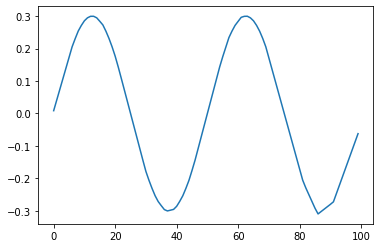

In [36]:
plt.plot(L.detach().numpy())

In [ ]:
asorted, indices = torch.sort(L)
plt.plot(asorted[0].detach().numpy())

In [ ]:
plt.plot(L[0].detach().numpy())

In [ ]:
Loss

In [ ]:
plt.plot(h[0].detach().numpy())

In [ ]:
torch.manual_seed(298630698)

In [ ]:
N=4
X = torch.zeros((N,1,1),requires_grad=False,dtype=float)
Y = torch.zeros((N,1,1),requires_grad=False,dtype=float)
W = torch.randn((1,N),requires_grad=True,dtype=float)
W1 = torch.randn((N,1,N),requires_grad=True,dtype=float)
b = torch.randn((N,),requires_grad=True,dtype=float)
b1 = torch.randn((N,),requires_grad=True,dtype=float)
a = torch.randn((N,),requires_grad=True,dtype=float)

In [ ]:
X.shape

In [ ]:
X[0,0,0]=1
X[1,0,0]=2
X[2,0,0]=3
X[3,0,0]=4

Y[0,0,0]=50
Y[1,0,0]=20
Y[2,0,0]=1
Y[3,0,0]=-1



In [ ]:
Y

In [ ]:
for i in range (10000):
    Z=X @ W +b
    h=m(Z)
    L= h @ a 
    #L= h @ W1 +b1
    #h1 = m 
    loss = torch.sum((L-Y[:,:,0])**2)
    W.grad = None
    b.grad = None
    a.grad = None
    loss.backward()
    val= loss #.detach().numpy()
    Loss.append(val.detach().numpy())
    r=0.0001
    b.data-=r*b.grad
    W.data-=r*W.grad
    a.data-=r*a.grad

print(val)

In [ ]:
m(X @ W +b)@a


In [ ]:
m(X @ W +b)

In [ ]:
m(X @ W +b)@a

In [ ]:
b

In [ ]:
a

In [ ]:
X


In [ ]:
W.shape

In [ ]:
a

In [ ]:
Z

In [ ]:
b

In [ ]:
Z= X @ W +b

In [ ]:
Z

In [ ]:
h=m(Z)
h

In [ ]:
a

In [ ]:
L=h @a

In [ ]:
torch.sum((L-Y[:,:,0])**2)

In [ ]:
L.shape

In [ ]:
X[:,0,0]

In [ ]:
L

In [ ]:
G.shape

In [ ]:
import numpy as np
import scipy
from scipy import linalg

h = np.arange(1, 6)

padding = np.zeros(h.shape[0] - 1, h.dtype)
first_col = np.r_[h, padding]
first_row = np.r_[h[0], padding]

H = linalg.toeplitz(first_col, first_row)

In [ ]:
x = scipy.linalg.toeplitz([1, 2, 3, 4])
x = np.asfortranarray(x)

In [ ]:
x

In [ ]:
import numpy as np
from scipy.linalg import toeplitz

W1=-toeplitz(np.r_[2, -1, np.zeros(N-2)])

In [ ]:
W1

In [ ]:
t = torch.from_numpy(W1)

In [ ]:
t.shape

In [ ]:
X.shape

In [ ]:
Z1= t @ X[:,:,0].cpu()

In [ ]:
plt.plot(Z1.detach().numpy())

In [ ]:
plt.plot(X[:,:,0].detach().numpy())

In [ ]:
from numba import cuda
cuda.select_device(0)
cuda.close()